In [52]:
import numpy as np 
from tqdm import tqdm 
from environment import Enviroment
import matplotlib.pyplot as plt 

# Value Table

In [53]:
value_function = np.load("./theoretical/value_function.npy")

In [54]:
value_function

array([[ 5.61344469,  8.9999211 , 11.75661048, 13.83162614],
       [ 8.99481133, 12.38128889, 15.13797997, 17.21299667],
       [11.8889956 , 15.27547344, 18.03216484, 20.10718163],
       [14.03204792, 17.41852942, 20.17522531, 22.25024349]])

# Actions

In [55]:
actions = np.load("./theoretical/actions.npy") 

# Policy visualization

In [56]:
policy_history = np.load("./theoretical/history.npy")

In [57]:
for policy in policy_history: 
    print(policy) 

[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]
[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]


In [58]:
optimal_policy = policy_history[-1]

In [59]:
print(optimal_policy) 

[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]


In [60]:
constants = np.load("./theoretical/constants.npy")
number_of_days = 20000000

In [61]:
rewards = np.load("./theoretical/rewards.npy")
rewards

array([10, -2])

In [62]:
max_number_of_cars, expected_request_lambda_1, expected_request_lambda_2, expected_return_lambda_1, expected_return_lambda_2 = constants

# Visualize policies as a contour

In [63]:
x = np.arange(0, max_number_of_cars + 1, 1)
y = np.arange(0, max_number_of_cars + 1, 1)

x, y = np.meshgrid(x, y)

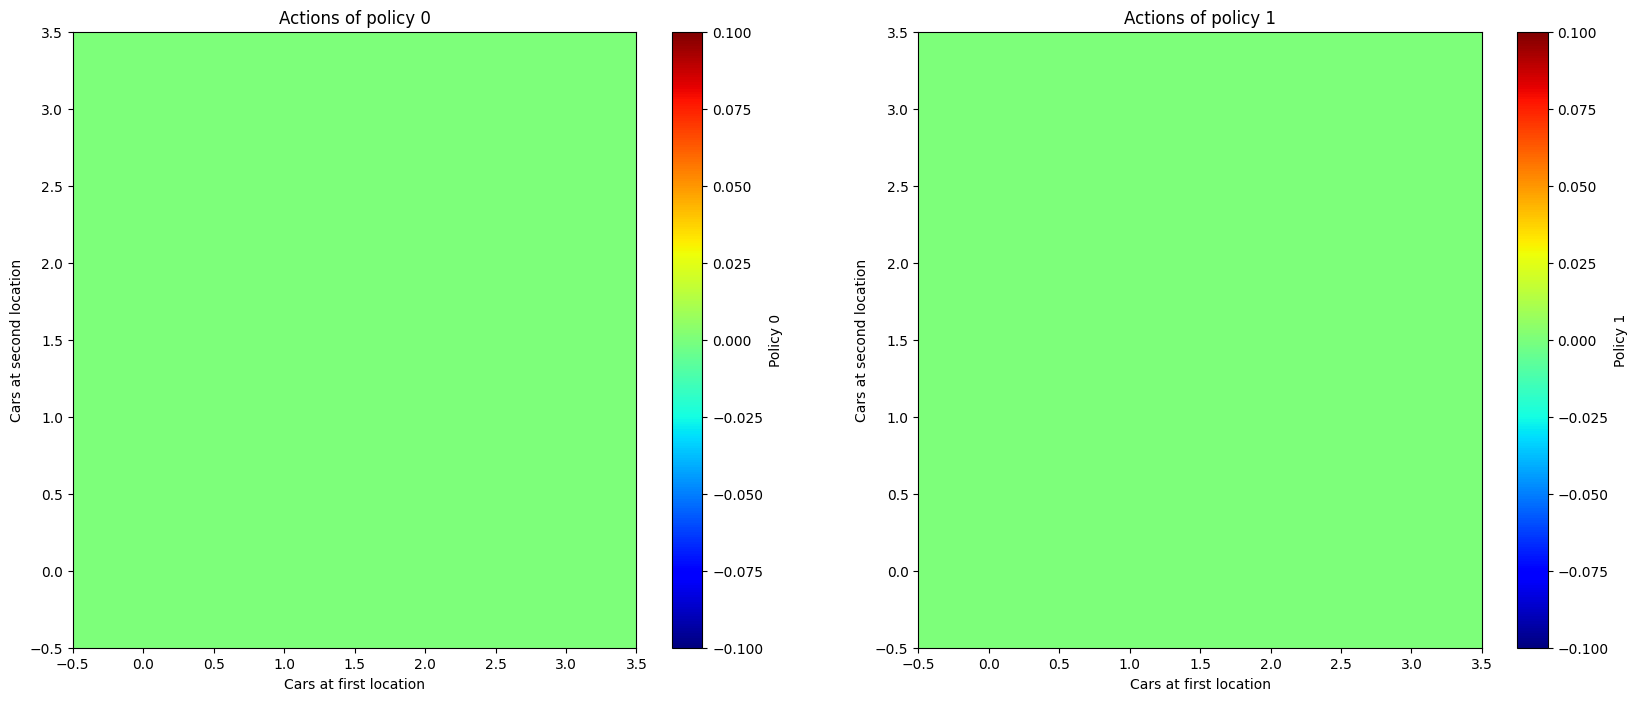

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))


for policy_index, policy in enumerate(policy_history): 
    z = np.zeros((max_number_of_cars + 1, max_number_of_cars + 1)) 

    for i in range(policy.shape[0]): 
        for j in range(policy.shape[1]): 
            state = (i, j) 
            action_index = policy[state] 
            action = actions[action_index[0], action_index[1]]

            z[state] = action

    c = axes[policy_index].pcolormesh(x, y, z, cmap="jet", shading="auto")
    fig.colorbar(c, ax=axes[policy_index], label=f"Policy {policy_index}")
    axes[policy_index].set_xlabel("Cars at first location")
    axes[policy_index].set_ylabel("Cars at second location")
    axes[policy_index].set_title(f"Actions of policy {policy_index}")